## ***8.LOGISTIC REGRESSION***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#### 1]Data Exploration:
#### 2]Data PreProcessing

In [3]:
diab=pd.read_csv("diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab.shape

(768, 9)

In [5]:
diab.info()
#no object or categorical dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diab.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
#there are no null values hence no need to delete or imputation

<Axes: >

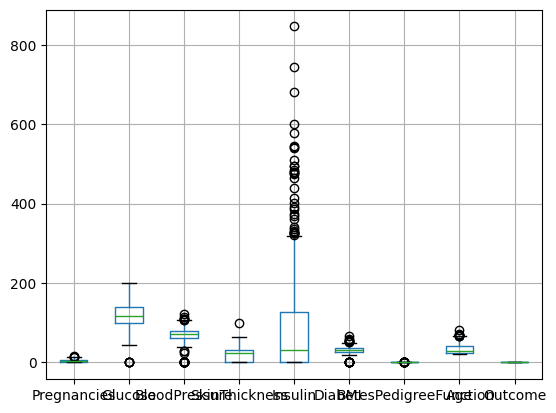

In [8]:
diab.boxplot()

In [9]:
diab.duplicated().sum()
diab.columns[diab.columns.duplicated()]

Index([], dtype='object')

In [10]:
def outlier_capping(diab,column):
 Q1=diab[column].quantile(0.25)
 Q3=diab[column].quantile(0.75)
 IQR=Q3-Q1
 UE=Q3+1.5*IQR
 LE=Q1-1.5*IQR
 diab[column]=diab[column].apply(lambda x:UE if x>UE else LE if x<LE else x)
for col in diab.select_dtypes(["int",'float']).columns:
 outlier_capping(diab,col)

<Axes: >

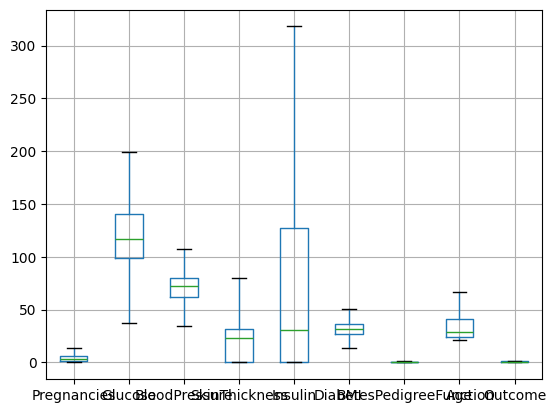

In [11]:
diab.boxplot()

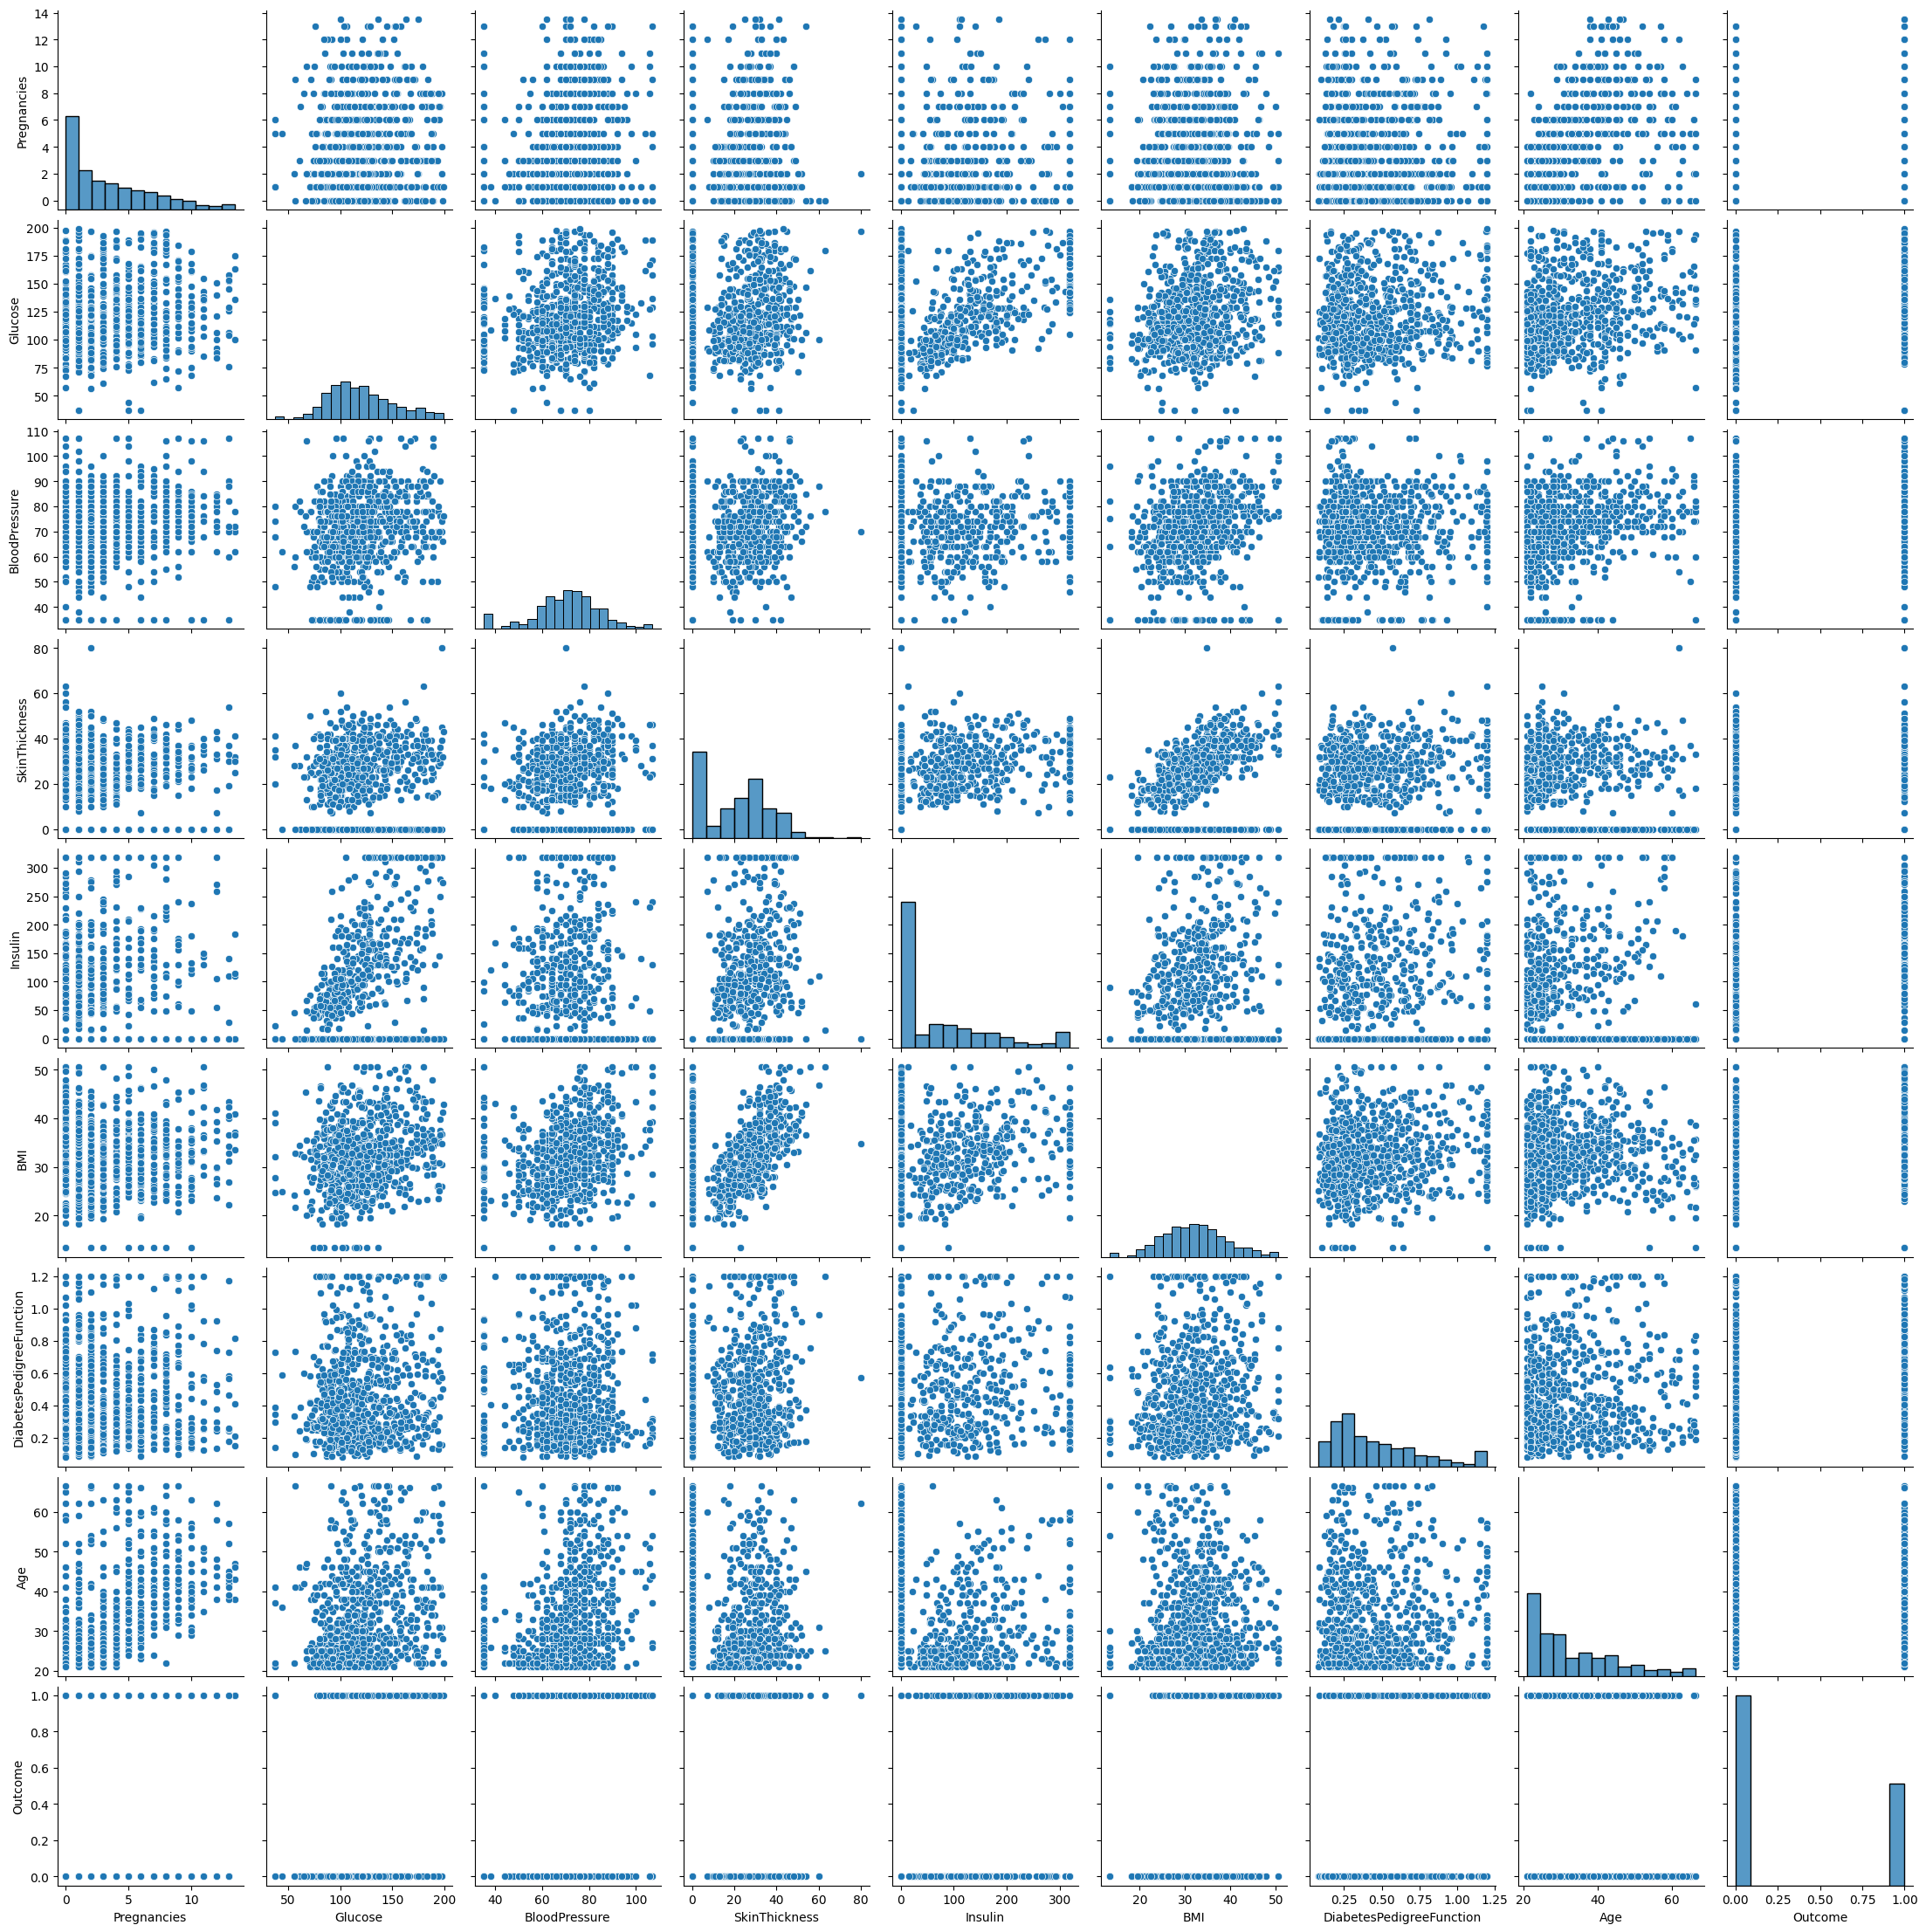

In [12]:
sns.pairplot(diab)

<Axes: >

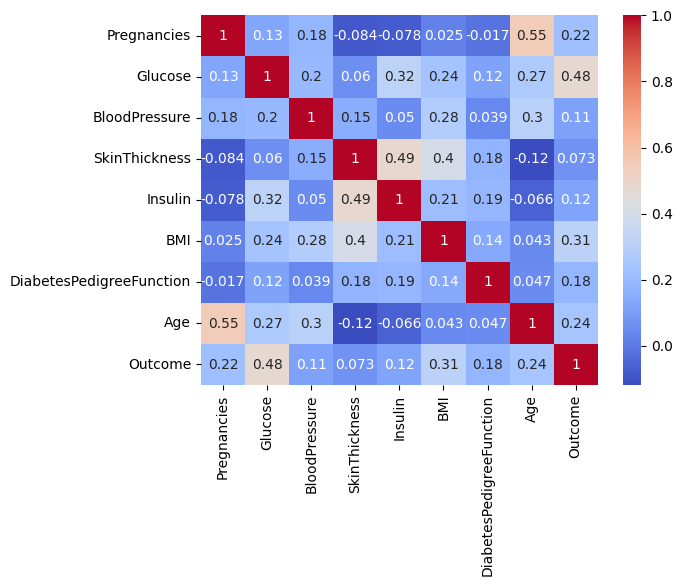

In [13]:
sns.heatmap(diab.corr(),annot=True,cmap='coolwarm')

In [14]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


#### 3]Model Building

In [15]:
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()
diab[["Glucose",'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',	'Age']]=std_sca.fit_transform(diab[["Glucose",'BloodPressure','SkinThickness','Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']])
#making changes in continuous column

In [16]:

diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691,1
1,1.0,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304,0
2,8.0,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252,1
3,1.0,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828,0
4,0.0,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199,1


In [17]:
target=diab[['Outcome']]
features=diab.drop(columns='Outcome')

In [18]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [19]:
diab.Outcome.unique()

array([1, 0])

#### 4]Model Evaluation

In [20]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7337662337662337

In [21]:
log_model.predict_proba(x_test)

array([[0.81146417, 0.18853583],
       [0.93863044, 0.06136956],
       [0.251804  , 0.748196  ],
       [0.894333  , 0.105667  ],
       [0.57482681, 0.42517319],
       [0.27509962, 0.72490038],
       [0.03529849, 0.96470151],
       [0.87515285, 0.12484715],
       [0.08553057, 0.91446943],
       [0.77105269, 0.22894731],
       [0.91240861, 0.08759139],
       [0.10998244, 0.89001756],
       [0.40929583, 0.59070417],
       [0.68499855, 0.31500145],
       [0.25849592, 0.74150408],
       [0.71007903, 0.28992097],
       [0.91998819, 0.08001181],
       [0.75819619, 0.24180381],
       [0.43883627, 0.56116373],
       [0.85251551, 0.14748449],
       [0.75940843, 0.24059157],
       [0.98872168, 0.01127832],
       [0.43920441, 0.56079559],
       [0.01796886, 0.98203114],
       [0.73907404, 0.26092596],
       [0.14259012, 0.85740988],
       [0.49850895, 0.50149105],
       [0.68869366, 0.31130634],
       [0.60175262, 0.39824738],
       [0.41351849, 0.58648151],
       [0.

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
conf=confusion_matrix(y_test,y_pred)
conf
#confusion matrix for model accuracy

array([[85, 16],
       [25, 28]])

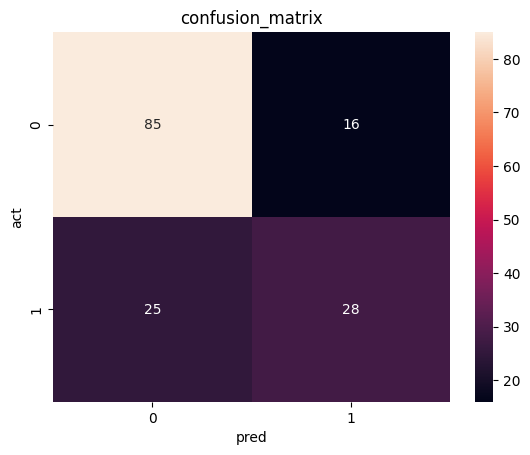

In [23]:
sns.heatmap(conf,annot=True)
plt.xlabel('pred')
plt.ylabel('act')
plt.title('confusion_matrix');

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       101
           1       0.64      0.53      0.58        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



In [25]:
#Here 1 and 0 represent disbetes or no diabetes.
#The model has overall acuraacy of 73%
#From precision and recalll we can understand that for class(0) the model has good precision of
#about 77% (identifying non diabetic people )and recall 84%(capturing almost 84% of them)
# Similarly goes for class (1) but it has kind of lower precision than class(0) for model.

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
sigmoid=log_model.predict_proba(x_test)[:,1]

In [27]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score


np.float64(0.7788156174107977)

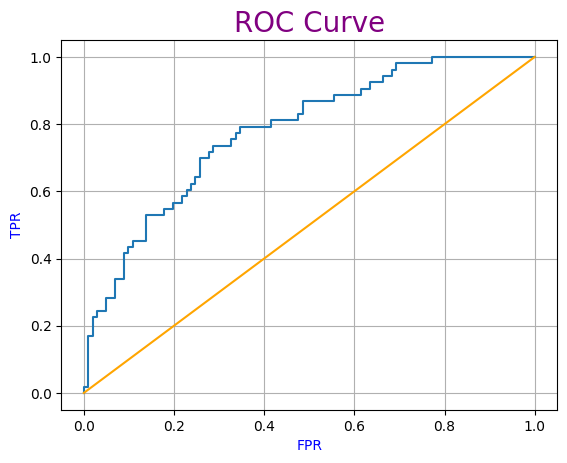

In [28]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)
plt.plot(fpr,tpr)
plt.plot([0,1],color='orange')
plt.xlabel('FPR',color='blue')
plt.ylabel('TPR',color='blue')
plt.title('ROC Curve',color='purple',size=20)
plt.grid()

### 5] Interpretation:

In [29]:
log_model.coef_

array([[ 0.10701262,  1.17818411, -0.14529184, -0.09048761, -0.08215012,
         0.72206412,  0.44984719,  0.23098586]])

Positive Coefficient: A positive coefficient means that as the value of the feature increases, the log-odds of the outcome (having diabetes) increase. This suggests that the feature is associated with a higher likelihood of having diabetes.

Negative Coefficient: A negative coefficient means that as the value of the feature increases, the log-odds of the outcome decrease. This suggests that the feature is associated with a low

In [30]:
#Features with larger absolute coefficient values have a greater impact on the predicted probability.
#Glucose: This feature has the largest positive coefficient (1.178), indicating it is the most significant predictor in your model. Higher glucose levels are strongly associated with a higher probability of having diabetes.
#DiabetesPedigreeFunction: This feature has a moderate positive coefficient (0.450), indicating that family history of diabetes (as captured by this function) is a notable predictor of increased diabetes probability.

### 6]Model Deployment

In [31]:
import pickle

In [32]:
file='log_model.pkl'
pickle.dump(log_model,open(file,'wb'))

In [33]:
!pip install -q streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.4 MB/s eta 0:00:00


In [34]:
!npm install -g localtunnel -U

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 4s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧npm notice
npm notice New major version of npm available! 10.8.2 -> 11.7.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.7.0
npm notice To update run: npm install -g npm@11.7.0
npm notice
⠧

In [35]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691,1
1,1.0,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304,0
2,8.0,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252,1
3,1.0,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828,0
4,0.0,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199,1


In [36]:
%%writefile MODEL_DEP_app.py
import streamlit as st
def user_input_parameters():
  Pregnancies=st.sidebar.number_input('Enter no of Pregnancies')
  Glucose=st.sidebar.number_input('Enter Glucose level')
  BP=st.sidebar.number_input('Enter your Blood Pressure')
  SKINTHICKNESS=st.sidebar.number_input('Enter your Skin Thickness')
  INSULIN=st.sidebar.number_input("Enter your Insulin")
  BMI=st.sidebar.number_input("Enter your BMI")
  DPF=st.sidebar.number_input("Enter your Diabetes Pedigree Function")
  AGE=st.sidebar.slider("Select your Age",0,100)
  data={"Pregnancies":Pregnancies,"Glucose":Glucose,"BP":BP,"SKINTHICKNESS":SKINTHICKNESS,"INSULIN":INSULIN,"BMI":BMI,"DPF":DPF,"AGE":AGE}
  features=pd.DataFrame(data,index=[0])
  return features
df=user_input_parameters()
st.subheader("user_input_variables")
st.write(df)
pred_prob=log_model.predict_proba(df)
pred=log_model.predict(df)

st.subheader("Predicted")
st.write("Probable for getting Diabetes" if pred_prob[0][1]>=0.5 else "Likely less Probable to get Diabetes")
st.subheader("Pred_Proba")
st.write(pred_prob)

Writing MODEL_DEP_app.py


In [37]:
!wget -q -0 - ipv4.icanhazip.com

wget: invalid option -- '0'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [41]:
'''
NTERVIEW QUESTIONS:


1.
ANSWER:
Precision (Quality): Measures the accuracy of the model's positive predictions.
It answers: "Of all the instances the model predicted as positive, how many were actually positive?".
FORMULA: TP/TP+FP

Recall (Quantity/Completeness): Measures the model's ability to find all actual positive instances.
It answers: "Of all the actual positive cases in the dataset, how many did the model correctly identify?".
FORMULA: TP/TP+FN


2.
ANSWER:Cross-validation involves partitioning a dataset into multiple subsets, training the model on some of these parts, and testing it on the
remaining "unseen" portion. The Process: In the most common form, k-fold cross-validation, the data is split into k equal-sized "folds".
The model is trained k times; each time, it uses \(k-1\) folds for training and the remaining single fold for evaluation.
The Result: The performance metrics (e.g., accuracy, precision, recall) from each iteration are averaged to provide a more stable estimate of the
model’s true performance than a single train-test split.
'''


<>:19: SyntaxWarning: invalid escape sequence '\('
<>:19: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-1096366954.py:19: SyntaxWarning: invalid escape sequence '\('
  The model is trained k times; each time, it uses \(k-1\) folds for training and the remaining single fold for evaluation.


'\nNTERVIEW QUESTIONS:\n\n\n1.\nANSWER:\nPrecision (Quality): Measures the accuracy of the model\'s positive predictions. \nIt answers: "Of all the instances the model predicted as positive, how many were actually positive?".\nFORMULA: TP/TP+FP\n\nRecall (Quantity/Completeness): Measures the model\'s ability to find all actual positive instances. \nIt answers: "Of all the actual positive cases in the dataset, how many did the model correctly identify?".\nFORMULA: TP/TP+FN\n\n\n2.\nANSWER:Cross-validation involves partitioning a dataset into multiple subsets, training the model on some of these parts, and testing it on the\nremaining "unseen" portion.\xa0The Process: In the most common form, k-fold cross-validation, the data is split into k equal-sized "folds". \nThe model is trained k times; each time, it uses \\(k-1\\) folds for training and the remaining single fold for evaluation.\nThe Result: The performance metrics (e.g., accuracy, precision, recall) from each iteration are averag